### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from pickle import dump

### Imagem

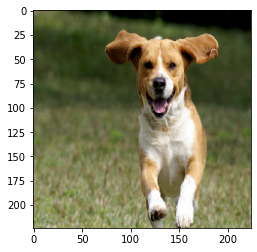

In [2]:
# load an image from file
#url = 'https://i.insider.com/5484d9d1eab8ea3017b17e29?width=600&format=jpeg&auto=webp'
#image = np.array(Image.open(requests.get(url, stream=True).raw))
image = load_img('data/dog.jpg', target_size=(224, 224))
plt.imshow(image)

### Example of usage

In [3]:
# convert the image pixels to a numpy array
image = img_to_array(image)

# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# prepare the image for the VGG model
image = preprocess_input(image)

# load the model
model = VGG16()

# model shape
print (len(model.layers))

# predict the probability across all output classes
yhat = model.predict(image)

# convert the probabilities to class labels
label = decode_predictions(yhat)

# retrieve the most likely result, e.g. highest probability
label = label[0][0]

# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

23
beagle (10.81%)


### Extracted features

In [4]:
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

# get extracted features
features = model.predict(image)
print(features.shape)

# save to file
dump(features, open('dog.pkl', 'wb'))

(1, 4096)


### Model without classifier layer

In [5]:
# load model without classifier layer
model = VGG16(include_top=False, input_shape=(300, 300, 3))

# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(10, activation='softmax')(class1)

# define new model
model = Model(inputs=model.inputs, outputs=output)
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 300, 300, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 300, 300, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 150, 150, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 150, 150, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 150, 150, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 75, 75, 128)      

In [6]:
# load model without classifier layers
model = VGG16(include_top=False, input_shape=(300, 300, 3))

# mark loaded layers as not trainable
for layer in model.layers:
    layer.trainable = False